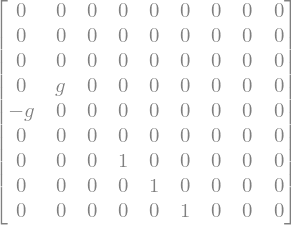

In [654]:
from __future__ import division

from sympy.interactive.printing import init_printing
# init_printing(use_unicode=False, wrap_line=False, use_latex="mathjax")

init_printing(use_unicode=False, wrap_line=False)
# from sympy.interactive import init_session
# init_session() 
from sympy.matrices import Matrix, eye, zeros, diag
from sympy import symbols, diff
import sympy as sp
import numpy as np

m = 9
T = 4
#consider a 2 robot system.
A1 = zeros(m, m)
B1 = zeros(m, T)
gravity = sp.Symbol('g')
A1[3, 1] = gravity
A1[4, 0] = -gravity
A1[6:, 3:6] = eye(3)
A1


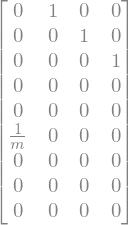

In [655]:
mass = symbols('m')
B1[5, 0] = 1 / mass
B1[:3, 1:] = eye(3)
B1

(9, 1)
(18, 1)
(8, 1)


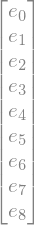

In [656]:
n = 2
A2 = A1.copy()
B2 = B1.copy()
A = diag([A1, A2], unpack=True)
B = diag([B1, B2], unpack=True)
# x1 = Matrix.vstack(Matrix(symbols('^1a_{:3}')), Matrix(symbols('^1v_{:3}')), Matrix(symbols('^1p_{:3}')))
x1 = Matrix(symbols(f'x:{m}'))
x2 = Matrix(symbols(f'x{m}:{2*m}'))
u1 = Matrix(symbols(f'u:{T}'))
# x2 = Matrix.vstack(Matrix(symbols('^2a_{:3}')), Matrix(symbols('^2v_{:3}')), Matrix(symbols('^2p_{:3}')))
u2 = Matrix(symbols(f'u{T}:{2*T}'))
x = Matrix.vstack(x1, x2)
u = Matrix.vstack(u1, u2)
c = sp.symbols('c')
Ds = Matrix([sp.symbols('Ds')])
eij = Matrix(symbols(f'e_:{m}', real=True))
print(eij.shape)
# Ds = 1
print(x.shape)
print(u.shape)
eij

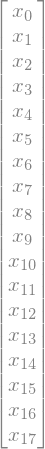

In [657]:
x


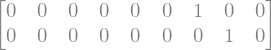

In [658]:
e7 = Matrix([0, 0, 0, 0, 0, 0, 1, 0, 0])
e8 = Matrix([0, 0, 0, 0, 0, 0, 0, 1, 0])
e9 = Matrix([0, 0, 0, 0, 0, 0, 0, 0, 1])
Exy = Matrix([e7.T, e8.T])
Exy

In [659]:
Ez = e9.T
Ez

In [660]:
def norm2(x):
    return sp.sqrt(x.T @ x)

In [661]:
def h(eij):
    return norm2(Exy @ (eij)) ** 4 + ((Ez / c) @ (eij)) ** 4 - Ds ** 4


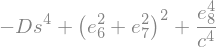

In [662]:
# tmp = (Exy@(x1-x2)).T @ (Exy@(x1-x2))
# tmp2 = tmp**4
h12 = h(eij)[0]
h12
# tmp1 = norm2(Exy@(x1-x2))**4 
# tmp2 = ((Ez / c) @ (x1 - x2))**4

-Ds**4 + ((-x15 + x6)**2 + (-x16 + x7)**2)**2 + (-x17 + x8)**4/c**4


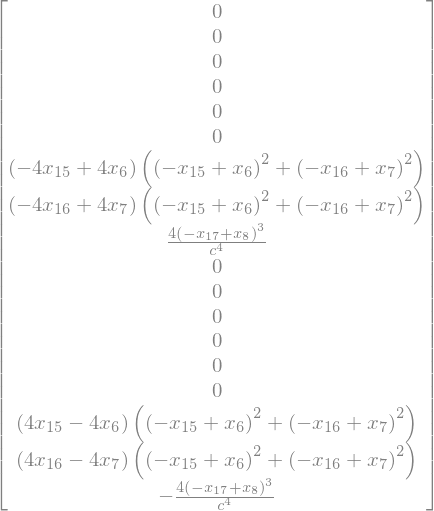

In [663]:
for i in range(m):
    h12 = h12.subs({eij[i]: (x1-x2)[i]})
print(h12)
dhdx = h12.diff(x)
dhdx = dhdx.reshape(9*n, 1)
dhdx = Matrix(dhdx)
dhdx


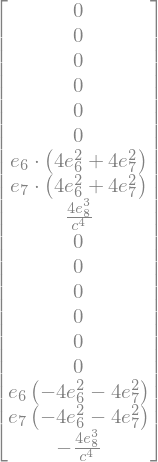

In [672]:

#compare this dhdx to my hand calculation

def hand_dhdx(eij, i=0, j=1):
    #this is the gradient wrt the large x of (xi - xj)
    grad_x_sub = zeros(m * n, m)
    grad_x_sub[m * i:m * (i + 1), :] = eye(m)
    grad_x_sub[m * j:m * (j + 1), :] = -eye(m)
    #this calculation looks correct

    return 4 * (norm2(Exy @ (eij)) ** 2)[0] * grad_x_sub @ (Exy.T @ Exy) @ (eij) + (4 / c) * \
        (((Ez / c) @ (eij)) ** 3)[0] * grad_x_sub @ Ez.T

def dhde(eij):
     return 4 * (norm2(Exy @ (eij)) ** 2)[0] * eye(m) @ (Exy.T @ Exy) @ (eij) + (4 / c) * \
        (((Ez / c) @ (eij)) ** 3)[0] * eye(m) @ Ez.T


my_dhdx = hand_dhdx(eij)
my_dhdx

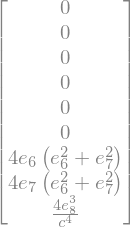

In [674]:
dhde_val = dhde(eij)
grad_x_sub = zeros(m * n, m)
grad_x_sub[:m, :] = eye(m)
grad_x_sub[m:, :] = -eye(m)
dhdx_frome = grad_x_sub @ dhde_val
# dhdx_frome
dhde_val.simplify()
dhde_val

In [668]:
#compare the two
subs_my = dhdx_frome
for i in range(m):
    subs_my = subs_my.subs({eij[i]: (x1-x2)[i]})
difference = subs_my - dhdx
difference.simplify()
# we can see that the two are the same
difference

In [419]:
#now lets check that the time derivative of h doesnt have a component in
(my_dhdx.T @ B)
#clearly all zeros, so we look at the next derivative

In [420]:
h_dot = (my_dhdx.T @ A @ xhat) * c**4
h_dot.simplify()
print(sp.multiline_latex('h', h_dot[0]))

\begin{align*}
\mathtt{\text{h}} = & 4 c^{4} \left(e_{6}^{2} + e_{7}^{2}\right) \left(- e_{6} \hat{x}_{12} + e_{6} \hat{x}_{3} - e_{7} \hat{x}_{13} + e_{7} \hat{x}_{4}\right) \\
& - 4 e_{8}^{3} \hat{x}_{14} \\
& + 4 e_{8}^{3} \hat{x}_{5} 
\end{align*}


In [421]:
d2hdx2 = diff(dhdx, x)
d2hdx2 = d2hdx2.reshape(m*n, m*n)
# print(d2hdx2) #this is the second derivative of h wrt x
# d2hdx2[8:, 8:13]

In [675]:
#compare to my hand calculation
def hand_d2hdx2(eij, i=0, j=1):
    grad_x_sub = zeros(m * n, m)
    grad_x_sub[m * i:m * (i + 1), :] = eye(m)
    grad_x_sub[m * j:m * (j + 1), :] = -eye(m)
    e_iz = zeros(m * n, 1)
    e_iz[m * i + m-1] = 1
    e_jz = zeros(m * n, 1)
    e_jz[m * j + m-1] = 1
    #ive checked the second term and it seems fine
    return grad_x_sub @ (8 * Exy.T @ Exy @ (eij) @ ((Exy @ (eij)).T @ Exy) + 4 * (norm2(Exy @ (eij)) ** 2)[
        0] * Exy.T @ Exy) @ grad_x_sub.T + (12 / c ** 2) * (((Ez / c) @ (eij)) ** 2)[0] * (e_iz - e_jz) @ (
                e_iz - e_jz).T

# xi = x1
# xj = x2
# i=0
# j=1
# grad_x_sub = zeros(12*n, 12)
# grad_x_sub[12*i:12*(i+1), :] = eye(12)
# grad_x_sub[12*j:12*(j+1), :] = -eye(12) 
# e_12iz = zeros(12*n, 1)
# e_12iz[12*i + 11] = 1
# e_12jz = zeros(12*n, 1)
# e_12jz[12*j + 11] = 1
# pt1 = grad_x_sub @ (8*Exy.T @ Exy @ (xi-xj) @ ((Exy @ (xi-xj)).T @ Exy) + 4* (norm2(Exy @ (xi-xj))**2)[0] * Exy.T @ Exy) @ grad_x_sub.T
# 
# pt2 = (12/c**2) * (((Ez / c) @ (xi - xj))**2)[0] * (e_12iz - e_12jz) @ (e_12iz - e_12jz).T
# pt2

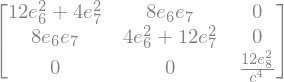

In [680]:
my_d2hdx2 = hand_d2hdx2(eij, i=0, j=1)
# my_d2hdx2[8:, 8:13]
my_d2hdx2.simplify()
my_d2hdx2[6:9, 6:9]

In [426]:
#compare
subs_my_d2 = my_d2hdx2
for i in range(m):
    subs_my_d2 = subs_my_d2.subs({eij[i]: (x1-x2)[i]})
difference2 = sp.ImmutableDenseNDimArray(subs_my_d2) - d2hdx2
difference2 = difference2.simplify()
found_nonzero = False
for i in range(m*n):
    for j in range(m*n):
        if difference2[i, j] != 0:
            found_nonzero = True
            print(i, j, difference2[i, j])

if not found_nonzero:
    print('All zeros')
else:
    print('Not all zeros')

All zeros


In [427]:
from scipy.spatial.transform import Rotation


def rpy_to_rot(rpy):
    roll, pitch, yaw = rpy
    sin = sp.sin
    cos = sp.cos
    
    yawMatrix = Matrix([
        [cos(yaw), -sin(yaw), 0],
        [sin(yaw), cos(yaw), 0],
        [0, 0, 1]
    ])


    pitchMatrix = Matrix([
        [cos(pitch), 0, sin(pitch)],
        [0, 1, 0],
        [-sin(pitch), 0, cos(pitch)]
    ])
    
    rollMatrix = Matrix([
        [1, 0, 0],
        [0, cos(roll), -sin(roll)],
        [0, sin(roll), cos(roll)]
    ])
    return yawMatrix @ pitchMatrix @ rollMatrix

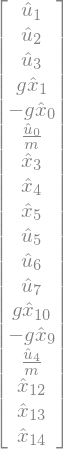

In [428]:

#symbolic xdot
xref = Matrix(symbols('x^{*}_{:%d}' % (m*n)))
u_eq = Matrix([mass * gravity, 0, 0, 0, mass*gravity, 0, 0, 0])
#essentially we always have

R_ref = eye(3)
R_ref[0, 0] = sp.cos(xref[2])
R_ref[0, 1] = -sp.sin(xref[2])
R_ref[1, 0] = sp.sin(xref[2])
R_ref[1, 1] = sp.cos(xref[2])
R = rpy_to_rot(x[:3])
#think about how to do this properly? for now if we assume the desired yaw is 0, then we have purely 
# xhat = x - xref
# uhat = u - u_eq

# x1hat = Matrix.vstack(Matrix(symbols('^1\hat{a}_{:3}')), Matrix(symbols('^1\hat{v}_{:3}')), Matrix(symbols('^1\hat{p}_{:3}')))
# u1hat = Matrix(symbols(f'^1u:{T}'))
# x2hat = Matrix.vstack(Matrix(symbols('^2\hat{a}_{:3}')), Matrix(symbols('^2\hat{v}_{:3}')), Matrix(symbols('^2\hat{p}_{:3}')))
# u2hat = Matrix(symbols(f'^1u{T}:{2*T}'))
# xhat = Matrix.vstack(x1hat, x2hat)
# uhat = Matrix.vstack(u1hat, u2hat)

xhat = Matrix(symbols('xhat:%d' % (m*n)))
uhat = Matrix(symbols('uhat:%d' % (n*T)))


# xhat = Matrix(symbols('\hat{x}_{:%d}' % (m*n)))
# uhat = Matrix(symbols('\hat{u}_{:%d}' % (n*T)))
# R = Rotation.from_euler('xyz', (1,2,3)).as_matrix()

# e = x - xref
# e
# this is how we form the error state using the desired yaw. essential R_des.T @ (x-xdes) where R_des is the desired yaw angle
# R_eq = Rotation.from_euler('xyz', [0, 0, x_des[2]]).as_matrix()
# R = Rotation.from_euler('xyz', x[:3]).as_matrix()
# R_err = R_eq.T @ R
# e[:3] = Rotation.from_matrix(R_err).as_euler('xyz')
# e[9:] = R_eq.T @ (x[9:] - x_des[9:])
# e[6:9] = R_eq.T @ (x[6:9] - x_des[6:9])
# e[3:6] = R_eq.T @ (x[3:6] - x_des[3:6])

xdot = A @ xhat + B @ uhat
xdot
# xdot
#need to think about how thi

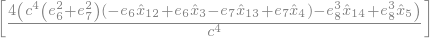

In [429]:
hdot = my_dhdx.T @ xdot
hdot.simplify()

hdot


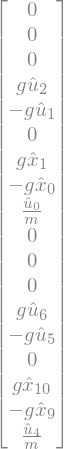

In [430]:
x_2dot = A @ A @ xhat + A @ B @ uhat
x_2dot    

In [432]:
h_2dot = my_dhdx.T @ x_2dot + (A @ xhat).T @ (my_d2hdx2.T @ (A @ xhat + B @ uhat)) 
h_2dot.simplify()
# h_2dot
h_2dot = h_2dot[0]
print_xhat = symbols('xhat:%d' % (m*n))
print_uhat = symbols('uhat:%d' % (n*T))
# for i in range(m*n):
#     print(xhat[i])

# hdot = hdot.subs(xhat, print_xhat)
# hdot = hdot.subs(uhat, print_uhat)
# print(hdot)
# h_2dot = h_2dot.subs(xhat, print_xhat)
# print(xhat)
# h_2dot = h_2dot.subs(uhat, print_uhat)

# print(e_print)
func = sp.lambdify((eij, xhat, uhat), h_2dot, 'numpy')
import inspect
print(inspect.getsource(func))



# print(sp.multiline_latex('\\ddot h', h_2dot[0]))

def _lambdifygenerated(_Dummy_716, _Dummy_717, _Dummy_718):
    [e_0, e_1, e_2, e_3, e_4, e_5, e_6, e_7, e_8] = _Dummy_716
    [xhat0, xhat1, xhat2, xhat3, xhat4, xhat5, xhat6, xhat7, xhat8, xhat9, xhat10, xhat11, xhat12, xhat13, xhat14, xhat15, xhat16, xhat17] = _Dummy_717
    [uhat0, uhat1, uhat2, uhat3, uhat4, uhat5, uhat6, uhat7] = _Dummy_718
    return 4*(c**4*m*(e_6*g*xhat1*(e_6**2 + e_7**2) - e_6*g*xhat10*(e_6**2 + e_7**2) - e_7*g*xhat0*(e_6**2 + e_7**2) + e_7*g*xhat9*(e_6**2 + e_7**2) + xhat12*(2*e_6*e_7*xhat13 - 2*e_6*e_7*xhat4 + xhat12*(3*e_6**2 + e_7**2) - xhat3*(3*e_6**2 + e_7**2)) + xhat13*(2*e_6*e_7*xhat12 - 2*e_6*e_7*xhat3 + xhat13*(e_6**2 + 3*e_7**2) - xhat4*(e_6**2 + 3*e_7**2)) - xhat3*(2*e_6*e_7*xhat13 - 2*e_6*e_7*xhat4 + xhat12*(3*e_6**2 + e_7**2) - xhat3*(3*e_6**2 + e_7**2)) - xhat4*(2*e_6*e_7*xhat12 - 2*e_6*e_7*xhat3 + xhat13*(e_6**2 + 3*e_7**2) - xhat4*(e_6**2 + 3*e_7**2))) + e_8**3*(uhat0 - uhat4) + 3*e_8**2*m*(xhat14 - xhat5)**2)/(c**4*m)



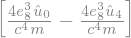

In [388]:
term1 = my_dhdx.T @ A@B@uhat #as I expected this only considers the thrust inputs, to encode the full dynamics we need to consider the full input, and therefore another derivative
term1 

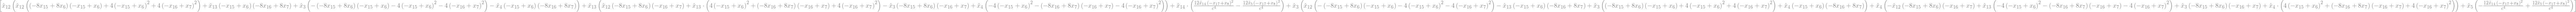

In [389]:
term2 = (A @ xhat).T @ (my_d2hdx2.T @ (A@xhat + B @ uhat))
term2

In [51]:
x_3dot = (A@A) @ (A @ xhat + B @ uhat)
x_3dot
d_h2dotdx = diff(h_2dot, x)
d_h2dotdx = d_h2dotdx.reshape(m*n,1)
d_h2dotdx = Matrix(d_h2dotdx)
print(d_h2dotdx.shape)
print(type(d_h2dotdx))
print(sp.latex(d_h2dotdx))

(18, 1)
<class 'sympy.matrices.dense.MutableDenseMatrix'>
\left[\begin{matrix}4 g \left(x_{16} - x_{7}\right) \left(\left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right)\\- 4 g \left(x_{15} - x_{6}\right) \left(\left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right)\\0\\4 \left(x_{12} - x^{*}_{12}\right) \left(- 3 \left(x_{15} - x_{6}\right)^{2} - \left(x_{16} - x_{7}\right)^{2}\right) - 4 \left(x_{12} - x^{*}_{12}\right) \left(3 \left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right) - 16 \left(x_{13} - x^{*}_{13}\right) \left(x_{15} - x_{6}\right) \left(x_{16} - x_{7}\right) + 16 \left(x_{15} - x_{6}\right) \left(x_{16} - x_{7}\right) \left(x_{4} - x^{*}_{4}\right) - 4 \left(x_{3} - x^{*}_{3}\right) \left(- 3 \left(x_{15} - x_{6}\right)^{2} - \left(x_{16} - x_{7}\right)^{2}\right) + 4 \left(x_{3} - x^{*}_{3}\right) \left(3 \left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right)\\- 16 \left(x_{12} - x^{*}_{12}\right

In [647]:
h_3dot = d_h2dotdx.T @ (A@xhat + B@uhat)
h_3dot.simplify()
print(sp.latex(h_3dot))
h_3dot

# h_3dot_t1 = my_dhdx.T @ x_3dot + x_2dot.T @  (my_d2hdx2.T @ (A@xhat + B @ uhat))
# print(sp.latex(h_3dot_t1))

\left[\begin{array}{cccccccccccccccccc}4 g \left(x_{16} - x_{7}\right) \left(\left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right) & - 4 g \left(x_{15} - x_{6}\right) \left(\left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right) & 0 & 4 \left(x_{12} - x^{*}_{12}\right) \left(- 3 \left(x_{15} - x_{6}\right)^{2} - \left(x_{16} - x_{7}\right)^{2}\right) - 4 \left(x_{12} - x^{*}_{12}\right) \left(3 \left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right) - 16 \left(x_{13} - x^{*}_{13}\right) \left(x_{15} - x_{6}\right) \left(x_{16} - x_{7}\right) + 16 \left(x_{15} - x_{6}\right) \left(x_{16} - x_{7}\right) \left(x_{4} - x^{*}_{4}\right) - 4 \left(x_{3} - x^{*}_{3}\right) \left(- 3 \left(x_{15} - x_{6}\right)^{2} - \left(x_{16} - x_{7}\right)^{2}\right) + 4 \left(x_{3} - x^{*}_{3}\right) \left(3 \left(x_{15} - x_{6}\right)^{2} + \left(x_{16} - x_{7}\right)^{2}\right) & - 16 \left(x_{12} - x^{*}_{12}\right) \left(x_{15} - x_{6}\right) \left

In [ ]:
#for this model we need h_4dot because it's the only one that will actually have a component for pitch and roll to be able to control the system,

In [485]:
#high level symbolic math
n=2
m=9
A = sp.MatrixSymbol('A', n*m, n*m)
B = sp.MatrixSymbol('B', n*m, n*T)
# x1 = sp.MatrixSymbol('x1',m, 1)
# x2 = sp.MatrixSymbol('x2',m, 1)
x = sp.Matrix(symbols('x:%d' % (n*m), real=True))
e = sp.Matrix(symbols('e:%d' % m, real=True))
xhat = sp.MatrixSymbol('xhat', n*m, 1)
u = sp.MatrixSymbol('u', n*T, 1)
c = sp.Symbol('c')
Ds = sp.MatrixSymbol('Ds', 1, 1)

In [486]:
def my_dhdx(eij, i=0, j=1):
    grad_x_sub = sp.zeros(m * n, m)
    grad_x_sub[m * i:m * (i + 1), :] = sp.eye(m)
    grad_x_sub[m * j:m * (j + 1), :] = -sp.eye(m)
    return 4 * (norm2(Exy @ (eij)) ** 2)[0] * grad_x_sub @ (Exy.T @ Exy) @ (eij) + (4 / c) * \
        (((Ez / c) @ (eij)) ** 3)[0] * grad_x_sub @ Ez.T

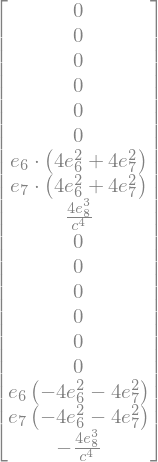

In [494]:
dhdx1 = my_dhdx(e)
dhdx1

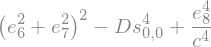

In [493]:
def h(eij):
    return norm2(Exy @ (eij)) ** 4 + ((Ez / c) @ (eij)) ** 4 - Ds ** 4

he = h(e)[0]
he

In [501]:
hx = he
Ediff = sp.Matrix.vstack(eye(9), -eye(9)).T
for i in range(m):
    hx = hx.subs({e[i]: (Ediff @ x)[i]})

dhdx1x = dhdx1
for i in range(m):
    dhdx1x = dhdx1x.subs({e[i]: (Ediff @ x)[i]})
dhdx2 = hx.diff(x)
(dhdx1x - dhdx2).simplify()

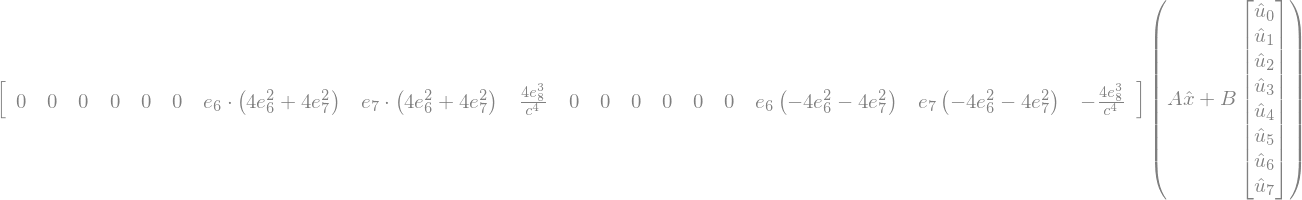

In [505]:
hdot = dhdx1.T @ (A @ xhat + B @ uhat)
hdot


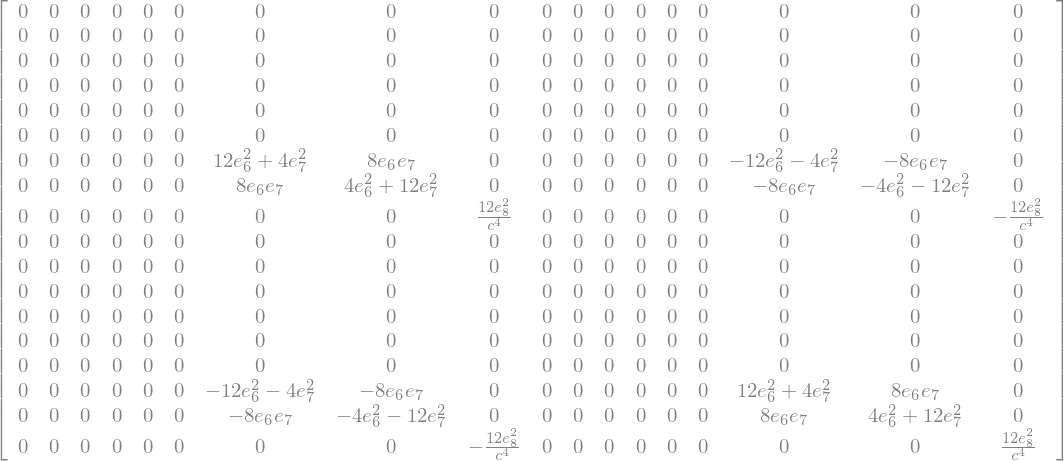

In [535]:
def hand_d2hdx2(eij, i=0, j=1):
    grad_x_sub = zeros(m * n, m)
    grad_x_sub[m * i:m * (i + 1), :] = eye(m)
    grad_x_sub[m * j:m * (j + 1), :] = -eye(m)
    e_iz = zeros(m * n, 1)
    e_iz[m * i + m-1] = 1
    e_jz = zeros(m * n, 1)
    e_jz[m * j + m-1] = 1
    #ive checked the second term and it seems fine
    return grad_x_sub @ (8 * Exy.T @ Exy @ (eij) @ ((Exy @ (eij)).T @ Exy) + 4 * (norm2(Exy @ (eij)) ** 2)[
        0] * Exy.T @ Exy) @ grad_x_sub.T + (12 / c ** 2) * (((Ez / c) @ (eij)) ** 2)[0] * (e_iz - e_jz) @ (
                e_iz - e_jz).T

my_d2hdx2 = hand_d2hdx2(e)
my_d2hdx2

In [539]:
x_2dot = A @ (A @ xhat + B @ uhat)


(18, 1)


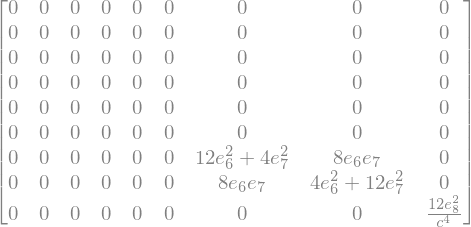

In [552]:
print(dhdx1x.shape)
h_2dot = dhdx1.T @ x_2dot + (A @ xhat).T @ (my_d2hdx2.T @ (A @ xhat + B @ uhat)) 
h_2dot = h_2dot.simplify()
my_d2hdx2[:9, :9] #this is the only relevant part of the matrix, the other bottom left corner is identical to this, and the off diagonal blocks are the negative of this 


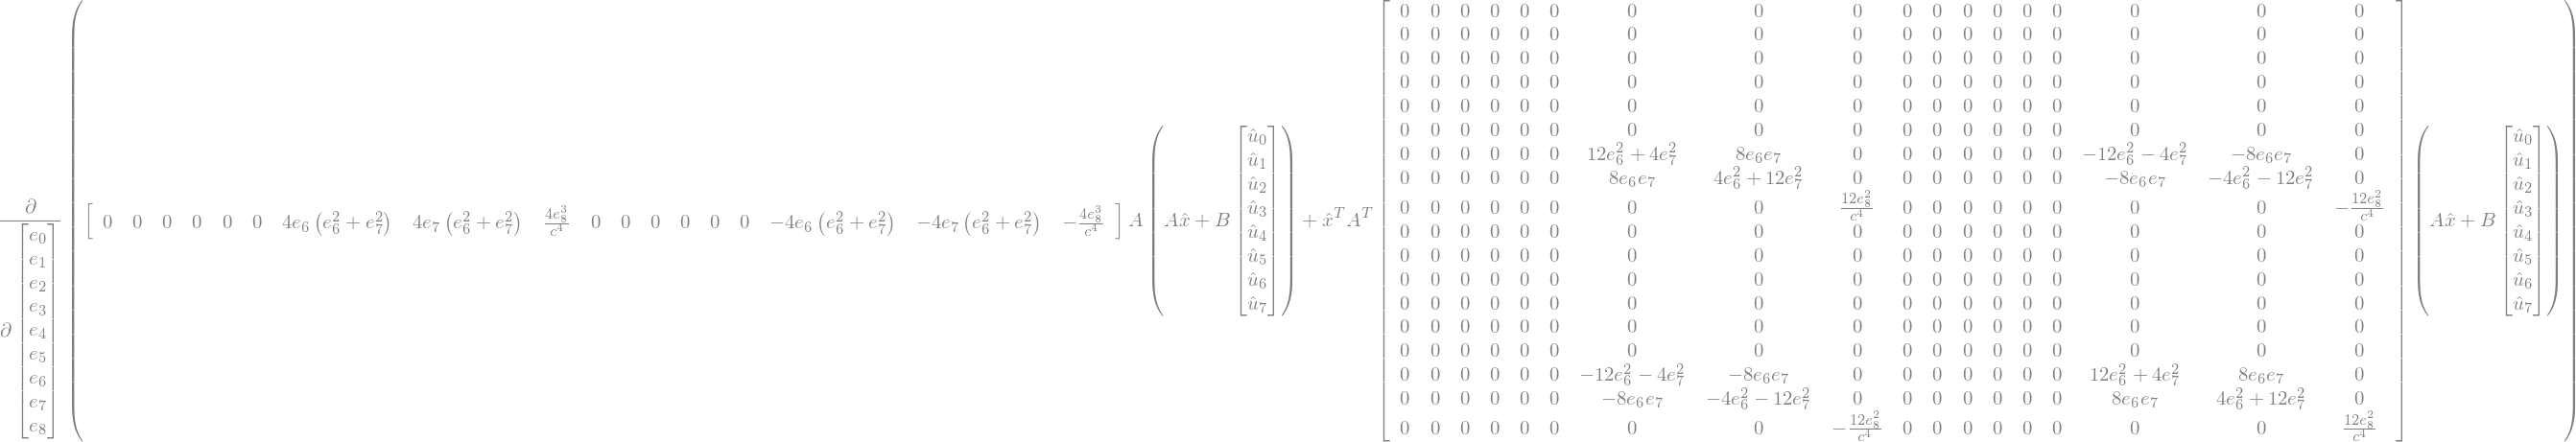

In [565]:
h_2dot
h_2dotde = h_2dot.diff(e)
h_2dotde

In [ ]:
x_3dot = A @ x_2dot
x_3dot

In [644]:
def tensor_prod(M, v):
    # M is a 4D tensor, v is a vector
    # dot product the last dimension of M with v
    res = sp.MutableDenseNDimArray.zeros(M.shape[0], M.shape[1], M.shape[2])
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            for k in range(M.shape[2]):
                for l in range(M.shape[3]):
                 res[i, j, k] += M[i, j, k, l] * v[l]
    return res

In [645]:
grad_hx3 = my_d2hdx2.diff(e)
print(grad_hx3.shape)
grad_hx3T = sp.permutedims(grad_hx3, (2,3,1,0))
type(grad_hx3T)

(9, 1, 18, 18)


sympy.tensor.array.dense_ndim_array.MutableDenseNDimArray

In [646]:
x_to_e = sp.Matrix.vstack(eye(9), -eye(9)).T
e_dot = x_to_e @ (A @ xhat + B @ uhat)
print(e_dot.shape)
print(grad_hx3T.shape)
mat = tensor_prod(grad_hx3T, e_dot).reshape(18,18)
mat = Matrix(mat)
print(mat.shape)

(9, 1)
(18, 18, 1, 9)


KeyboardInterrupt: 

In [643]:

x_dot = (A @ xhat + B @ uhat)
G = (my_d2hdx2.T @ (A @ xhat + B @ uhat))
print(type(x_3dot))
print(type(G))
T1 = dhdx1.T @ x_3dot
print(T1.shape)
T2 = x_2dot.T @ G
print(T2.shape)
T31 = (A@xhat).T
print(T31.shape)
T321 = (my_d2hdx2.T @ x_2dot)
print(T321.shape)
T322 = (x_dot.T @ mat).T
print(T322.shape)
T32 = (T321 + T322)
print(T32.shape)
T3 = T31 @ T32
print(T3.shape)
T4 = x_dot.T @ my_d2hdx2 @ x_2dot
print(T4.shape)
#print types of all the terms

print(type(T1))
print(type(T2))
print(type(T3))
print(type(T4))
h_3dot = T1 + T2 + T3 + T4

<class 'sympy.matrices.expressions.matmul.MatMul'>
<class 'sympy.matrices.expressions.matmul.MatMul'>
(1, 1)
(1, 1)
(1, 18)
(18, 1)
(18, 1)
(18, 1)
(1, 1)
(1, 1)
<class 'sympy.matrices.expressions.matmul.MatMul'>
<class 'sympy.matrices.expressions.matmul.MatMul'>
<class 'sympy.matrices.expressions.matmul.MatMul'>
<class 'sympy.matrices.expressions.matmul.MatMul'>


In [639]:
print(type(h_3dot))
h_3dot = h_3dot.simplify()
h_3dot_func = sp.lambdify((e, A, B, xhat, uhat), h_3dot, 'numpy')

<class 'sympy.matrices.expressions.matadd.MatAdd'>


AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'as_coeff_Mul'

In [602]:

import numpy as np
a1 = np.zeros((9,1,18,18))
a2 = np.zeros((18,18,1,9))
v1 = np.zeros((9,1))
(a2@v1).shape

In [ ]:
#lets formulate on e = xi-xj to make the math simpler, and assume we know the structure of the matrix
